<a href="https://colab.research.google.com/github/aruaru0/pytorch-tests/blob/main/supervision_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 658.7 kB/s eta 0:00:00


In [13]:
!apt install wget

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wget is already the newest version (1.21.2-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [14]:
!wget https://user0514.cdnw.net/shared/img/thumb/susipaku1128PAR53491367_TP_V.jpg
!mv susipaku1128PAR53491367_TP_V.jpg image.jpg

--2023-11-07 01:19:02--  https://user0514.cdnw.net/shared/img/thumb/susipaku1128PAR53491367_TP_V.jpg
Resolving user0514.cdnw.net (user0514.cdnw.net)... 172.104.125.193
Connecting to user0514.cdnw.net (user0514.cdnw.net)|172.104.125.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 307282 (300K) [image/jpeg]
Saving to: ‘susipaku1128PAR53491367_TP_V.jpg’

susipaku1128PAR5349 100%[===================>] 300.08K   860KB/s    in 0.3s    

2023-11-07 01:19:03 (860 KB/s) - ‘susipaku1128PAR53491367_TP_V.jpg’ saved [307282/307282]



In [105]:
import cv2
from ultralytics import YOLO
import supervision as sv


model = YOLO("yolov8n.pt")
image = cv2.imread("image.jpg")
results = model(image)[0]
# detections = sv.Detections.from_ultralytics(results)


0: 448x640 16 persons, 1 traffic light, 1 backpack, 5 handbags, 1 suitcase, 10.2ms
Speed: 3.5ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


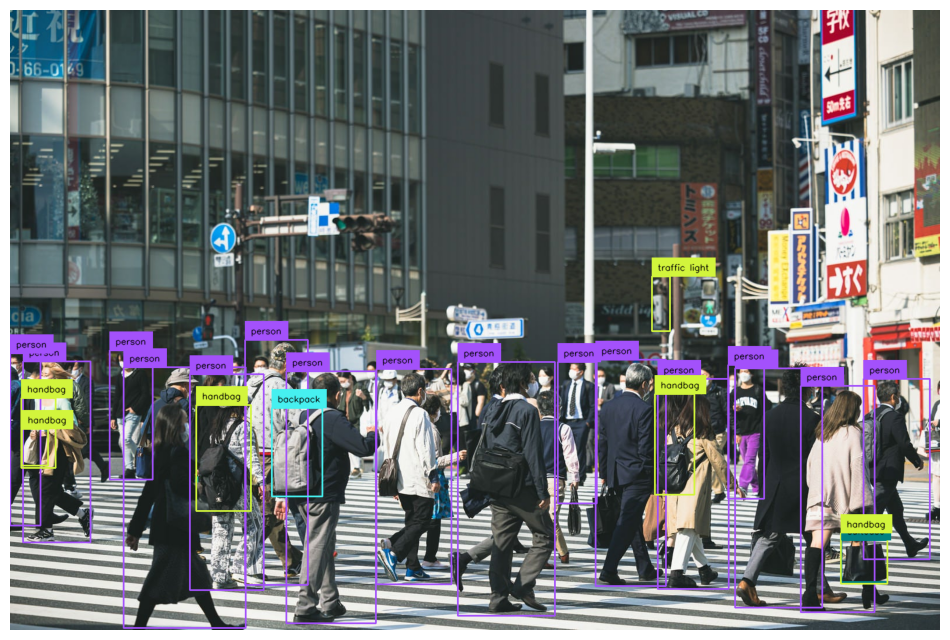

In [107]:
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    results.names[class_id]
    for class_id
    in detections.class_id
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(annotated_image)

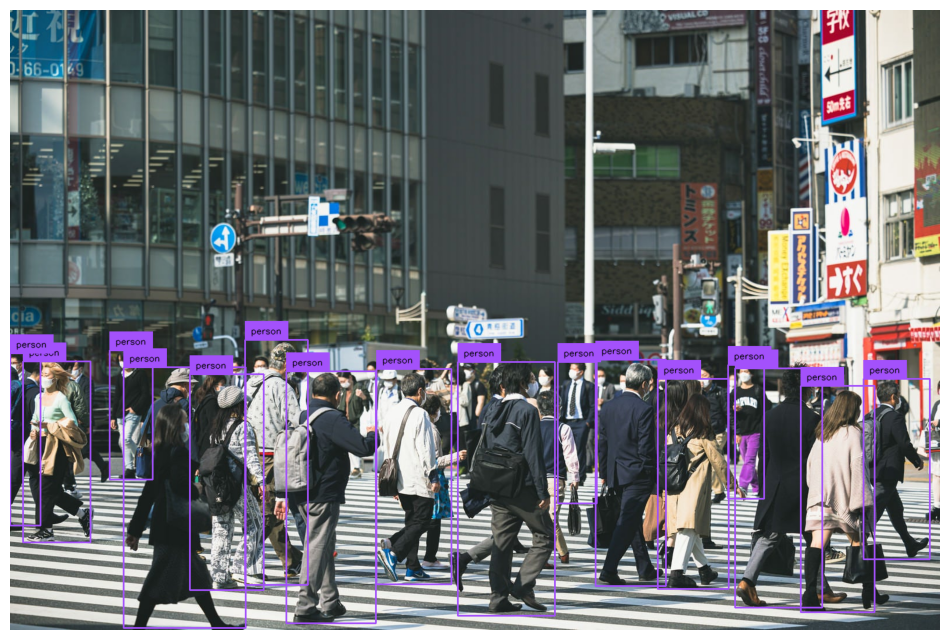

In [21]:
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]

image = cv2.imread("image.jpg")

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    results.names[class_id]
    for class_id
    in detections.class_id
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(annotated_image)

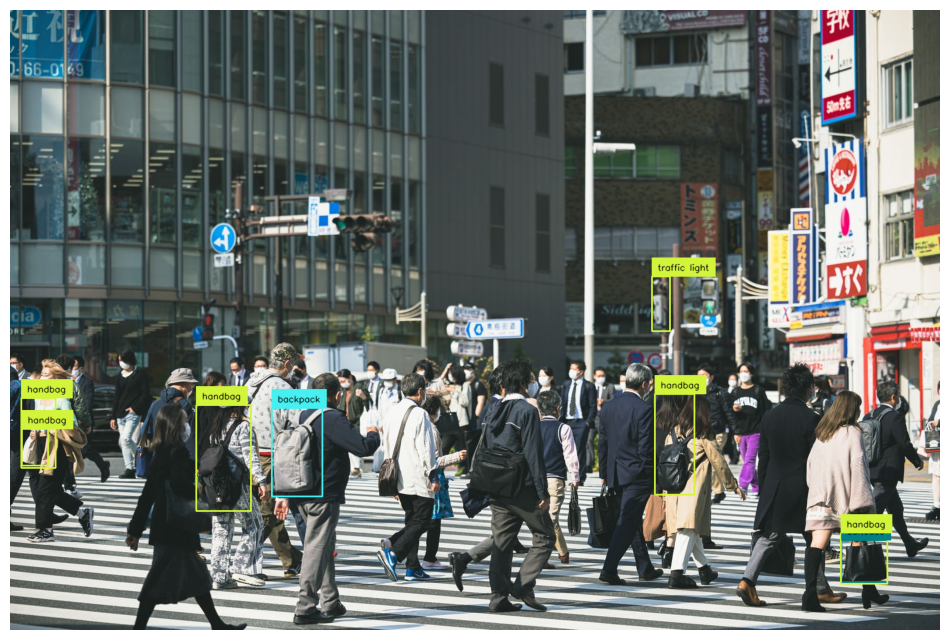

In [24]:
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id != 0]

image = cv2.imread("image.jpg")

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    results.names[class_id]
    for class_id
    in detections.class_id
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(annotated_image)

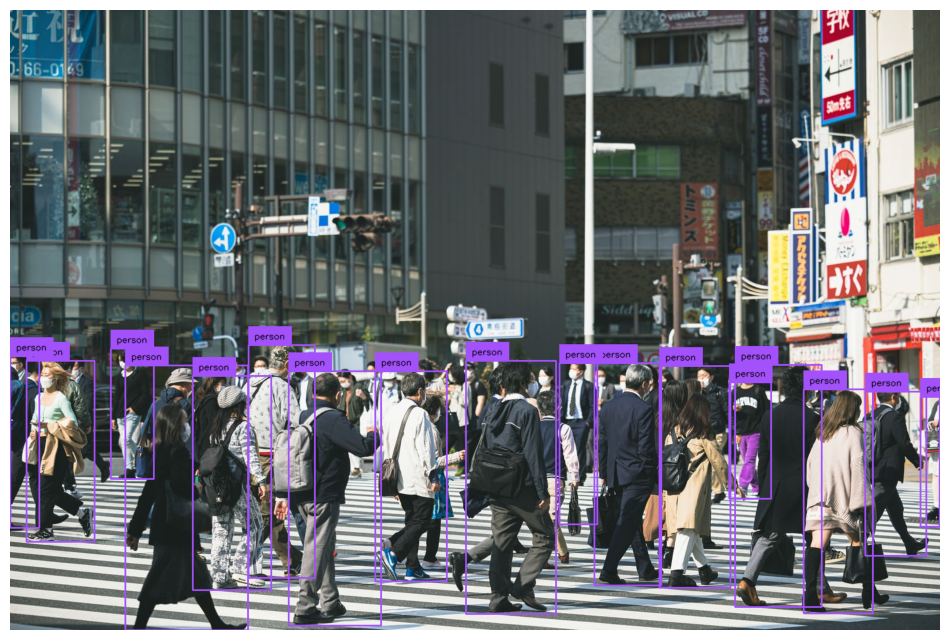

In [98]:
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.confidence > 0.5]

image = cv2.imread("image.jpg")

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [
    results.names[class_id]
    for class_id
    in detections.class_id
]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(annotated_image)

In [108]:
import cv2
from ultralytics import YOLO
import supervision as sv


model = YOLO("yolov8n-seg.pt")
image = cv2.imread("image.jpg")
results = model(image)[0]


0: 448x640 17 persons, 2 backpacks, 3 handbags, 11.4ms
Speed: 2.8ms preprocess, 11.4ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


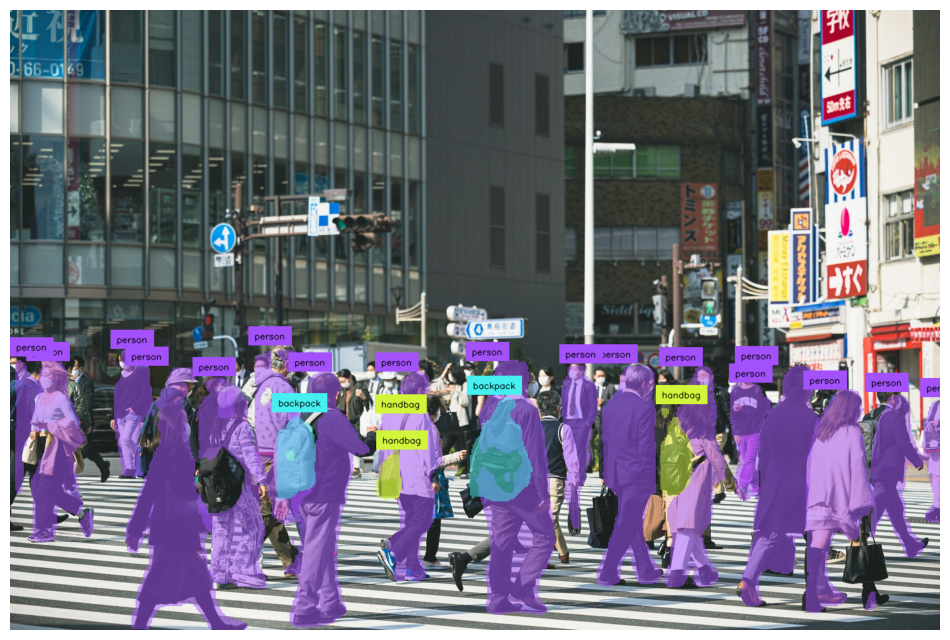

In [102]:
detections = sv.Detections.from_ultralytics(results)
image = cv2.imread("image.jpg")

label_annotator = sv.LabelAnnotator()
mask_annotator = sv.MaskAnnotator()

labels = [
    results.names[class_id]
    for class_id
    in detections.class_id
]

annotated_image = mask_annotator.annotate(
    scene = image, detections = detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(annotated_image)

In [47]:
# results.masks

In [87]:
# masks = [ sv.polygon_to_mask(p,(width,height)) for p in results.masks ]

# sv.plot_images_grid(
#   images = masks,
#   grid_size = ( 8, 20),
#   size = (16, 16))

In [60]:
# p = results.masks

In [72]:
# results.orig_shape

(1067, 1600)

In [90]:
# poly = []
# for e in p[0].xy[0] :
#   poly.append([int(e[0]), int(e[1])])

# poly[:10]

[615, 758]

In [96]:
# height, width = results.orig_shape
# masks = sv.polygon_to_mask(poly,(width,height))

In [8]:
!wget https://user-images.githubusercontent.com/26109316/276552454-691e219c-0565-4403-9218-ab5644f39bce.mp4
!mv *.mp4 sample.mp4

--2023-11-07 01:11:54--  https://user-images.githubusercontent.com/26109316/276552454-691e219c-0565-4403-9218-ab5644f39bce.mp4
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6175218 (5.9M) [video/mp4]
Saving to: ‘276552454-691e219c-0565-4403-9218-ab5644f39bce.mp4’

276552454-691e219c- 100%[===================>]   5.89M  --.-KB/s    in 0.02s   

2023-11-07 01:11:54 (317 MB/s) - ‘276552454-691e219c-0565-4403-9218-ab5644f39bce.mp4’ saved [6175218/6175218]



In [9]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
tracker = sv.ByteTrack()
box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()
trace_annotator = sv.TraceAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {results.names[class_id]}"
        for class_id, tracker_id
        in zip(detections.class_id, detections.tracker_id)
    ]

    annotated_frame = box_annotator.annotate(
        frame.copy(), detections=detections)
    annotated_frame = label_annotator.annotate(
        annotated_frame, detections=detections, labels=labels)
    return trace_annotator.annotate(
        annotated_frame, detections=detections)

sv.process_video(
    source_path="sample.mp4",
    target_path="result.mp4",
    callback=callback
)


0: 384x640 31 persons, 2 birds, 1 kite, 109.9ms
Speed: 3.0ms preprocess, 109.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 persons, 1 kite, 12.6ms
Speed: 4.8ms preprocess, 12.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 33 persons, 2 birds, 1 kite, 16.6ms
Speed: 4.0ms preprocess, 16.6ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 40 persons, 2 birds, 1 kite, 10.6ms
Speed: 7.0ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 41 persons, 3 birds, 1 kite, 9.6ms
Speed: 3.1ms preprocess, 9.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 40 persons, 1 bird, 1 kite, 8.3ms
Speed: 5.6ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 39 persons, 1 bird, 1 kite, 18.1ms
Speed: 3.2ms preprocess, 18.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640